# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [4]:
# Read data into a dataframe and call info()
    # Example call:
    # df = pd.DataFrame({"A":[1, 2, 3], "B":[4, 5, 6]})
    # df.info()

# My Question

### Write your question here.

# Which country has the most Netflix movies and TV shows?

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Netflix_Movies_and_TV_Shows.csv")
df.sample(5)

,Title,Type,Genre,Release Year,Rating,Duration,Country
111,Title 112,Movie,Documentary,1971,TV-14,138 min,Japan
1878,Title 1879,Movie,Drama,1959,PG,1 Seasons,United States
1560,Title 1561,TV Show,Action,1998,TV-14,68 min,Germany
966,Title 967,TV Show,Thriller,2011,TV-PG,145 min,Japan
1967,Title 1968,Movie,Action,1980,TV-PG,3 Seasons,Japan


In [45]:
df.shape

(3000, 7)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3000 non-null   object
 1   Type          3000 non-null   object
 2   Genre         3000 non-null   object
 3   Release Year  3000 non-null   int64 
 4   Rating        3000 non-null   object
 5   Duration      3000 non-null   object
 6   Country       3000 non-null   object
dtypes: int64(1), object(6)
memory usage: 164.2+ KB


In [47]:
df.rename(columns={
    "Title": "title",
    "Type": "type",
    "Genre": "genre",
    "Release Year": "release_year",
    "Rating": "rating",
    "Duration": "duration",
    "Country": "country"
}, inplace=True)

In [48]:
df.sample(5)

,title,type,genre,release_year,rating,duration,country
999,Title 1000,TV Show,Sci-Fi,2021,TV-PG,116 min,Australia
514,Title 515,TV Show,Sci-Fi,1960,PG,1 Seasons,South Korea
1488,Title 1489,Movie,Drama,1973,TV-MA,3 Seasons,United States
2629,Title 2630,TV Show,Sci-Fi,1976,PG,168 min,Japan
1207,Title 1208,Movie,Comedy,2011,PG-13,1 Seasons,Germany


In [49]:
df.drop(["title"], axis=1, inplace=True)

In [50]:
df.sample(5)

,type,genre,release_year,rating,duration,country
1021,TV Show,Horror,1956,TV-14,2 Seasons,United Kingdom
2735,Movie,Sci-Fi,1976,TV-14,98 min,South Korea
1730,TV Show,Thriller,2006,TV-MA,174 min,United States
1167,Movie,Comedy,1980,TV-14,3 Seasons,South Korea
135,Movie,Romance,2005,G,65 min,Japan


In [51]:
df['type'].value_counts()

TV Show    1527
Movie      1473
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

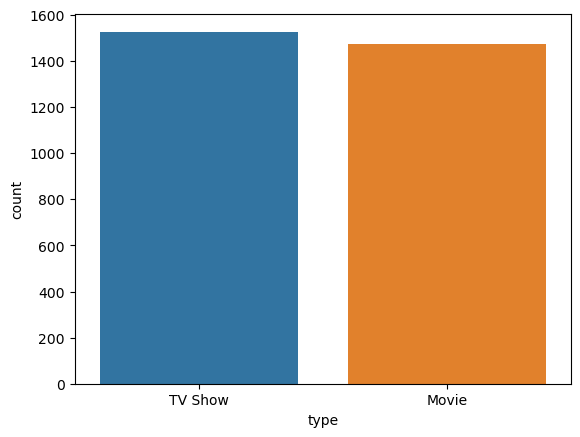

In [52]:
sns.countplot(data=df, x="type")

In [53]:
df['genre'].value_counts()

Horror         398
Thriller       398
Drama          378
Romance        376
Comedy         369
Documentary    369
Action         367
Sci-Fi         345
Name: genre, dtype: int64

<AxesSubplot:xlabel='genre', ylabel='count'>

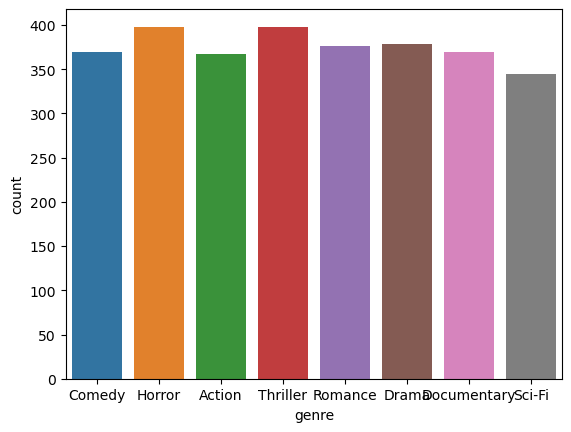

In [54]:
sns.countplot(data=df, x="genre")

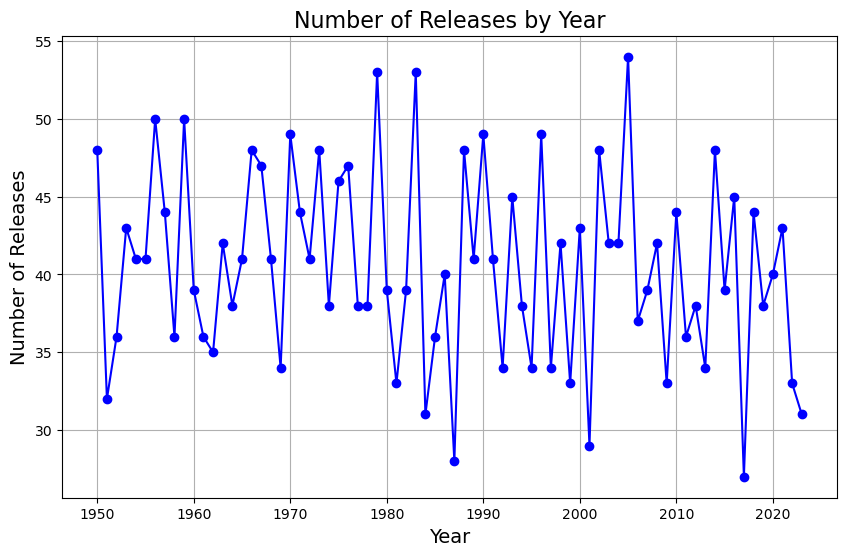

In [55]:
release_year_counts  = df['release_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', linestyle='-', color='b')
plt.title('Number of Releases by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Releases', fontsize=14)
plt.grid(True)
plt.show()

In [56]:
df['rating'].value_counts()

TV-14    441
R        441
PG       434
TV-PG    430
PG-13    422
TV-MA    418
G        414
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

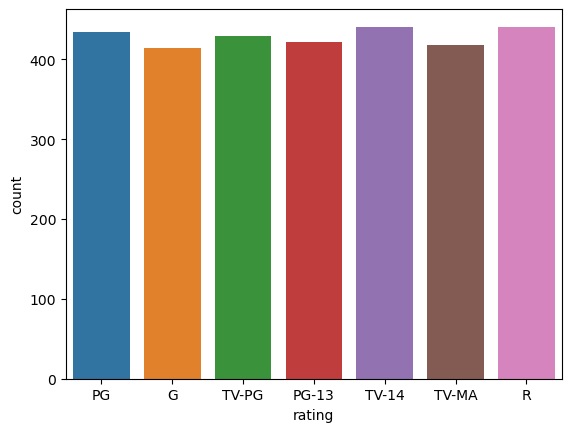

In [57]:
sns.countplot(data=df, x="rating")

In [58]:
df.sample(5)

,type,genre,release_year,rating,duration,country
1259,Movie,Sci-Fi,1982,PG-13,169 min,India
360,TV Show,Drama,1998,PG,131 min,Japan
2108,Movie,Horror,1975,R,106 min,Japan
2175,Movie,Drama,1962,TV-14,3 Seasons,Australia
1395,Movie,Sci-Fi,1972,PG-13,91 min,Germany


In [59]:
duration_type = df['duration'].str.split(" ").str.get(1)
df.insert(5, "duration_type", duration_type)

df["duration"] = df["duration"].str.split(" ").str.get(0).astype(int)

In [60]:
df.sample(5)

,type,genre,release_year,rating,duration,duration_type,country
2568,TV Show,Action,1975,TV-PG,77,min,South Korea
885,TV Show,Action,1980,PG,155,min,South Korea
70,Movie,Horror,2018,TV-14,89,min,Germany
215,TV Show,Drama,1986,TV-14,1,Seasons,Germany
1693,Movie,Drama,2021,G,3,Seasons,South Korea


In [61]:
df["country"].value_counts()

Canada            421
United Kingdom    392
South Korea       376
Germany           373
Australia         371
United States     369
Japan             349
India             349
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

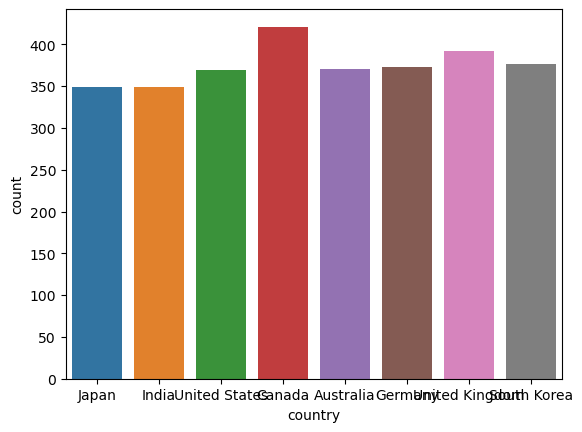

In [62]:
sns.countplot(data=df, x="country")

In [63]:
df.to_csv("netflix_movies_and_tv_shows_v2.csv", index=False)

In [64]:
df.columns

Index(['type', 'genre', 'release_year', 'rating', 'duration', 'duration_type',
       'country'],
      dtype='object')

In [70]:
 import pandas as pd

# Read the CSV file
df = pd.read_csv('Netflix_Movies_and_TV_Shows.csv')

# Count the occurrences of each country
country_counts = df['Country'].value_counts()

# Find the country with the highest count
most_common_country = country_counts.idxmax()

print("The country with the most Netflix movies and TV shows is:", most_common_country)

The country with the most Netflix movies and TV shows is: Canada


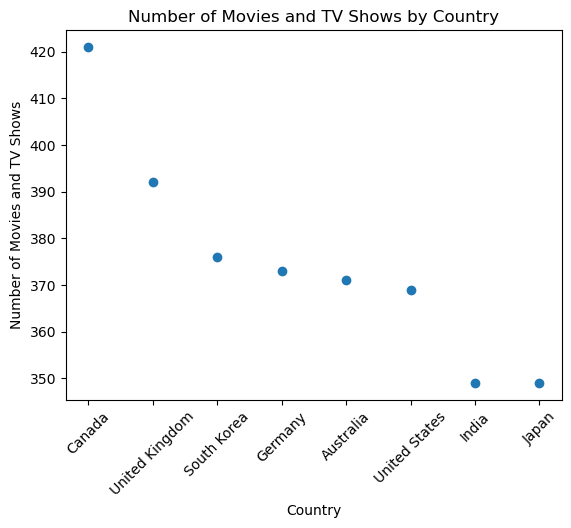

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Netflix_Movies_and_TV_Shows.csv')

# Group the data by country and count the number of rows in each group
country_counts = df.groupby('Country').size()

# Sort the countries by the number of movies and TV shows
sorted_countries = country_counts.sort_values(ascending=False)

# Create a scatter plot of the number of movies and TV shows by country
plt.scatter(sorted_countries.index, sorted_countries.values)

# Add labels and title to the plot
plt.xlabel('Country')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Number of Movies and TV Shows by Country')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

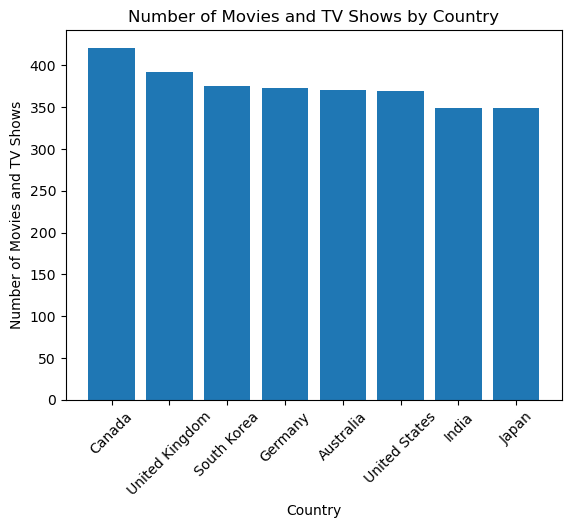

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Netflix_Movies_and_TV_Shows.csv')

# Group the data by country and count the number of rows in each group
country_counts = df.groupby('Country').size()

# Sort the countries by the number of movies and TV shows
sorted_countries = country_counts.sort_values(ascending=False)

# Create a bar chart of the number of movies and TV shows by country
plt.bar(sorted_countries.index, sorted_countries.values)

# Add labels and title to the plot
plt.xlabel('Country')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Number of Movies and TV Shows by Country')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# My Analysis

# My Answer

The country with the most Netflix movies and TV shows is: Canada
Using all these  different techniques I have seen that Canada stands out of every other country regarding that it produces
the most movies and tv shows.